In [1]:
%matplotlib inline


## Gradients

Let's learn about gradients. We'll start with visualizing a vector in 2d space.


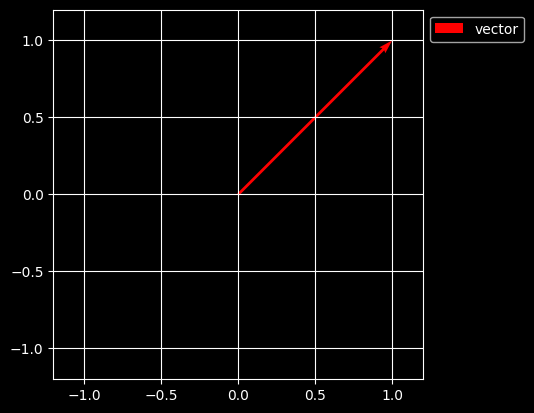

In [24]:
from dlib.helper import VectorScene
import tensorflow as tf

vector = tf.Variable([1.0,1.0])

scene = VectorScene()
(scene
 .add_vector(vector, color='r', name='vector')
 .display()
 )



Let's calculate it's length and angle:

In [25]:
length = tf.sqrt(tf.reduce_sum(vector*vector))
angle = tf.atan2(vector[1], vector[0])
print('The length of the vector is:', length.numpy())
print('The angle of the vector is:', angle.numpy())

The length of the vector is: 1.4142135
The angle of the vector is: 0.7853982


Let's now calculate angle and length, while recording this new concept called a gradient. 

In [26]:

with tf.GradientTape(persistent=True) as tape:
    length = tf.sqrt(tf.reduce_sum(vector*vector))
    angle = tf.atan2(vector[1], vector[0])
    
length_grad = tape.gradient(length, vector)
angle_grad = tape.gradient(angle, vector)
del tape


Now let's look at what these gradients do:

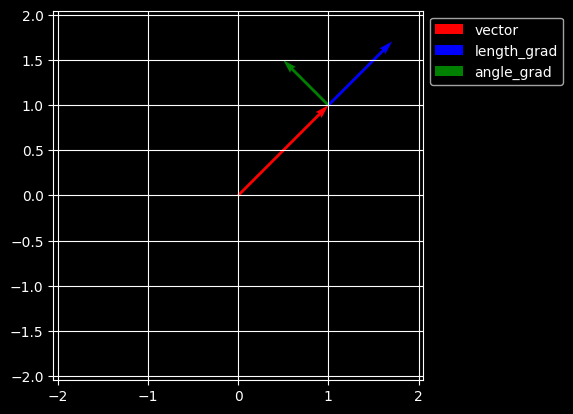

In [27]:
scene = VectorScene()
(scene
 .add_vector(vector, color='r', name='vector')
 .add_vector_at(vector, length_grad, color='b', name='length_grad')
 .add_vector_at(vector, angle_grad, color='g', name='angle_grad')
 .display()
 )


Ah ha! The `length_grad` points in the direction that the vector should move in to increase it's length. The angle vector points in the direction of an increase in angle. 

## Gradient Ascent

We expect if we add the gradient to our vector that we get a vector with a larger angle. Let's give that a spin.

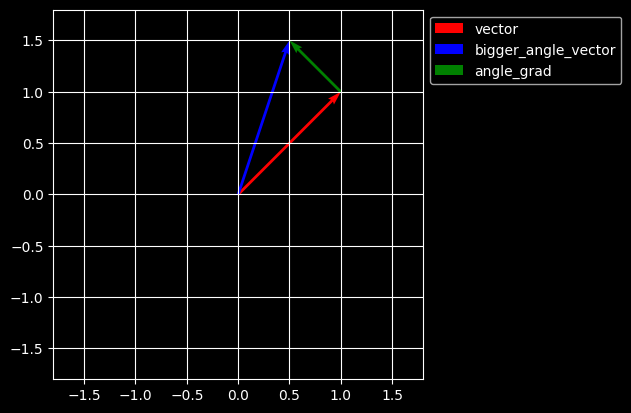

In [28]:
vector = tf.Variable([1.0,1.0])
with tf.GradientTape(persistent=True) as tape:
    angle = tf.atan2(vector[1], vector[0])

angle_grad = tape.gradient(angle, vector)

bigger_angle_vector = vector + angle_grad

(VectorScene()
 .add_vector(vector, color='r', name='vector')
 .add_vector(bigger_angle_vector, color='b', name='bigger_angle_vector')
 .add_vector_at(vector, angle_grad, color='g', name='angle_grad')
 .display())


As promised with get a vector with a bigger angle. 

**Looping**

What if we do this on repeat? We should get our vector to spin. We will have to replace the following line `bigger_angle_vector = vector + angle_grad` with `vector.assign_add(angle_grad)` since we don't want to create new tensorflow vectors. 

In [29]:
vector = tf.Variable([1.0,1.0])
vector_snaps = []
grad_snaps = []
for i in range(100):
    with tf.GradientTape(persistent=True) as tape:
        angle = tf.atan2(vector[1], vector[0])
    angle_grad = tape.gradient(angle, vector)
    del tape
    vector_snaps.append(vector.numpy().copy())
    grad_snaps.append(angle_grad.numpy().copy())
    vector.assign_add(angle_grad)

MovieWriter imagemagick unavailable; using Pillow instead.


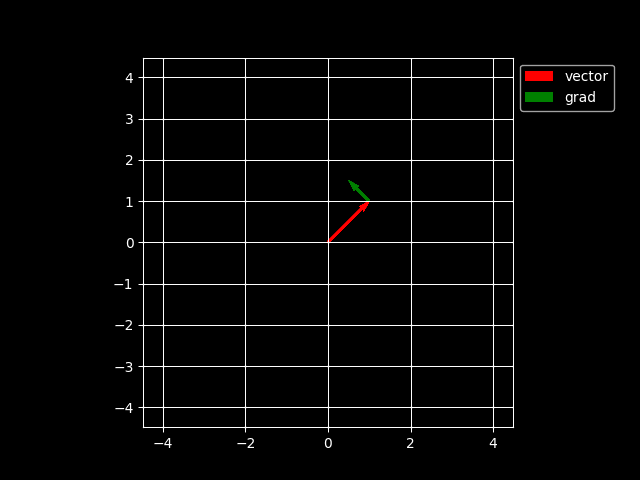

In [30]:
scene = VectorScene()
(scene
 .add_animated_vector(vector_snaps, color='r', name='vector')
 .add_animated_vector_at(vector_snaps, grad_snaps, color='g', name='grad')
 .animate()
 )

In the above we are maximizing the vector angle, let's now try maximizing the vector length:

In [31]:
vector = tf.Variable([1.0,1.0])
vector_snaps = []
grad_snaps = []
for i in range(100):
    with tf.GradientTape(persistent=True) as tape:
        length = tf.sqrt(tf.reduce_sum(vector*vector))
    length_grad = tape.gradient(length, vector)
    del tape
    vector_snaps.append(vector.numpy().copy())
    grad_snaps.append(length_grad.numpy().copy())
    vector.assign_add(length_grad)

MovieWriter imagemagick unavailable; using Pillow instead.


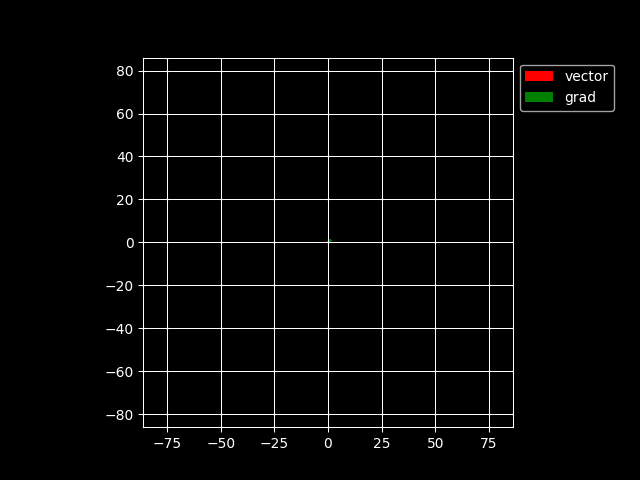

In [32]:
scene = VectorScene()
(scene
 .add_animated_vector(vector_snaps, color='r', name='vector')
 .add_animated_vector_at(vector_snaps, grad_snaps, color='g', name='grad')
 .animate()
 )

Minimizing should look be the same but with using `assign_sub`, instead of `assign_add`.

In [33]:
vector = tf.Variable([1.0,1.0])
vector_snaps = []
grad_snaps = []
for i in range(100):
    with tf.GradientTape(persistent=True) as tape:
        length = tf.sqrt(tf.reduce_sum(vector*vector))
    length_grad = tape.gradient(length, vector)
    del tape
    vector_snaps.append(vector.numpy().copy())
    grad_snaps.append(length_grad.numpy().copy())
    vector.assign_sub(length_grad)

MovieWriter imagemagick unavailable; using Pillow instead.


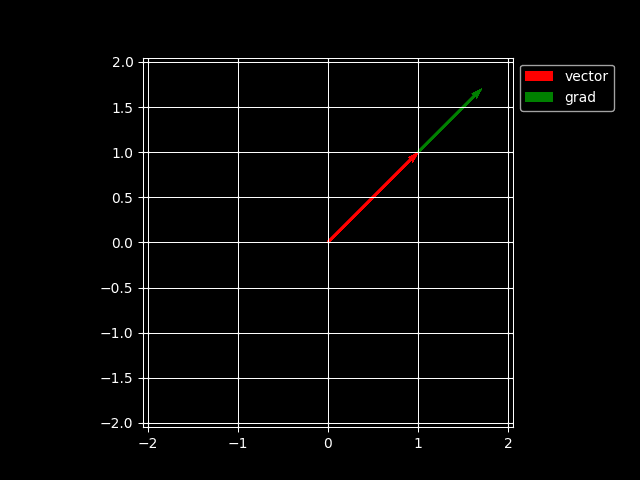

In [34]:
scene = VectorScene()
(scene
 .add_animated_vector(vector_snaps, color='r', name='vector')
 .add_animated_vector_at(vector_snaps, grad_snaps, color='g', name='grad')
 .animate()
 )

Hmm, that's not what we wanted. The vector is jumping *too far* in the correct direction, let's multiply the gradient by a small number to get rid of this behavior. This small constant is called a *learning rate*.

In [37]:
vector = tf.Variable([1.0,1.0])
vector_snaps = []
grad_snaps = []
leanring_rate = 0.1
for i in range(10):
    with tf.GradientTape(persistent=True) as tape:
        length = tf.sqrt(tf.reduce_sum(vector*vector))
    length_grad = tape.gradient(length, vector)
    del tape
    vector_snaps.append(vector.numpy().copy())
    grad_snaps.append(length_grad.numpy().copy())
    vector.assign_sub(leanring_rate*length_grad)

MovieWriter imagemagick unavailable; using Pillow instead.


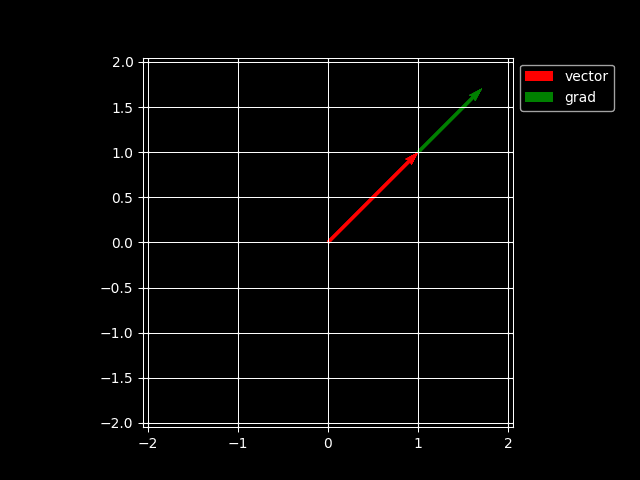

In [38]:
scene = VectorScene()
(scene
 .add_animated_vector(vector_snaps, color='r', name='vector')
 .add_animated_vector_at(vector_snaps, grad_snaps, color='g', name='grad')
 .animate()
 )

Perfect!

If we can minimize length, why can't we minimize a more complex function?

For example, maybe I want to find the middle point between two vectors, I could probably do that by minimizing the sum of the distance between the two of them.

In [ ]:
vector = tf.Variable([1.0, 1.0])
vector_a = tf.constant([2.0, 4.0])
vector_b = tf.constant([3.0, 1.0])
vector_snaps = []
grad_snaps = []
learning_rate = 0.1
for i in range(50):
    with tf.GradientTape(persistent=True) as tape:
        distance_to_a_from_one_squared = tf.reduce_sum((vector-vector_a)**2)
        distance_to_b_from_one_squared = tf.reduce_sum((vector-vector_b)**2 )
        one_loss = distance_to_a_from_one_squared + distance_to_b_from_one_squared

    length_grad = tape.gradient(one_loss, vector)
    del tape
    vector_snaps.append(vector.numpy().copy())
    grad_snaps.append(length_grad.numpy().copy())
    vector.assign_sub(learning_rate*length_grad)

MovieWriter imagemagick unavailable; using Pillow instead.


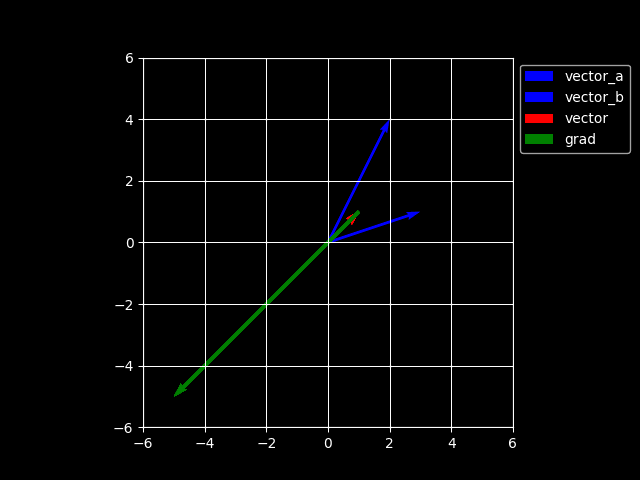

In [44]:
scene = VectorScene()
(scene
 .add_animated_vector(vector_snaps, color='r', name='vector')
 .add_animated_vector_at(vector_snaps, grad_snaps, color='g', name='grad')
 .add_vector(vector_a, color='b', name='vector_a')
 .add_vector(vector_b, color='b', name='vector_b')
 .animate()
 )

## Local Minima

Say you love strawberry ice cream but will settle for blueberry. Let's make a reward function where we reward being close to either of the ice creams. 


In [54]:
vector1 = tf.Variable([1.0, 1.0])
vector2 = tf.Variable([2.0, 1.0])
vector_blueberry = tf.constant([2.0, 4.0])
vector_strawberry = tf.constant([3.0, 1.0])
vector_one_snaps = []
vector_two_snaps = []
grad_one_snaps = []
grad_two_snaps = []
learning_rate = 0.1
for i in range(50):
    with tf.GradientTape(persistent=True) as tape:
        distance_to_a_from_one_squared = tf.reduce_sum((vector-vector_a)**2)
        distance_to_b_from_one_squared = tf.reduce_sum((vector-vector_b)**2 )
        one_loss = 1/(1+distance_to_a_from_one_squared) + 1/(1+distance_to_b_from_one_squared)
        distance_to_a_from_two_squared = tf.reduce_sum((vector2-vector_a)**2)
        distance_to_b_from_two_squared = tf.reduce_sum((vector2-vector_b)**2 )
        two_loss = 1/(1+distance_to_a_from_two_squared) + 1/(1+distance_to_b_from_two_squared)

    length_one_grad = tape.gradient(one_loss, vector)
    length_two_grad = tape.gradient(two_loss, vector2)
    del tape
    vector_one_snaps.append(vector1.numpy().copy())
    grad_one_snaps.append(length_one_grad.numpy().copy())
    vector_two_snaps.append(vector2.numpy().copy())
    grad_two_snaps.append(length_two_grad.numpy().copy())

    
    vector1.assign_sub(learning_rate*length_one_grad)
    vector2.assign_sub(learning_rate*length_two_grad)

MovieWriter imagemagick unavailable; using Pillow instead.


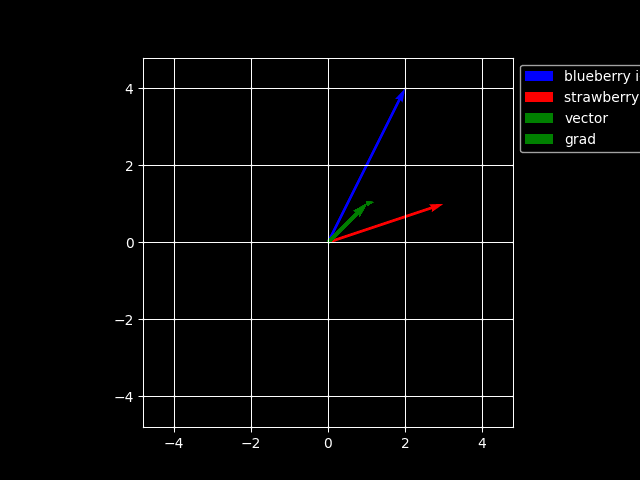

In [ ]:
scene = VectorScene()
(scene
 .add_animated_vector(vector_one_snaps, color='g', name='vector')
    .add_animated_vector_at(vector_one_snaps, grad_one_snaps, color='g', name='grad')
 .add_animated_vector_at(vector_snaps, grad_snaps, color='g', name='grad')
 .add_vector(vector_blueberry, color='b', name='blueberry ice cream')
 .add_vector(vector_strawberry, color='r', name='strawberry ice cream')
 .animate()
 )

# Training


In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(x_train_arr, y_train_arr), (x_test_arr, y_test_arr) = mnist.load_data()
x_train, x_test, y_train, y_test = tf.convert_to_tensor(x_train_arr), tf.convert_to_tensor(x_test_arr), tf.convert_to_tensor(y_train_arr), tf.convert_to_tensor(y_test_arr)


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(10, activation='softmax')
])

/home/jackson/code/dl/venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:

def loss_fn(predictions, labels):
    log_probs = tf.math.log(predictions + 1e-36)
    one_hot = tf.one_hot(labels, 10)
    losses = -tf.reduce_sum(one_hot * log_probs, axis=1)
    return tf.reduce_mean(losses)

pred_train = model(x_train)
loss_fn(pred_train, y_train)



<tf.Tensor: shape=(), dtype=float32, numpy=69.94563293457031>

We would expect a naive model to have a mean log probability of $log(1/10)\approx 2.3$. But in this case, we are getting a higher number, this is because the unutilized model is very confidently wrong. Therefore we get many logs of near 0 values. 

## The Gradient

How do we improve this linear model?

In [9]:
with tf.GradientTape() as tape:
    pred_train = model(x_train)

    loss = loss_fn( pred_train, y_train)

gradients = tape.gradient(loss, model.trainable_variables)


Reshaped gradient shape: (28, 28, 10)


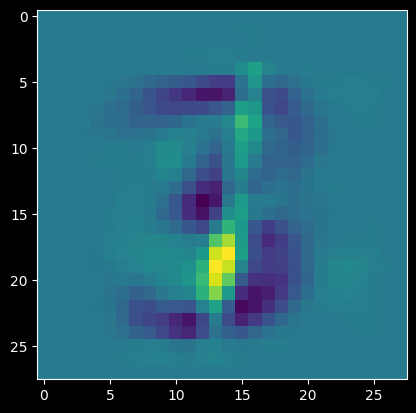

In [10]:
# let's look at gradients



from matplotlib import pyplot as plt

reshaped_gradient = tf.reshape(gradients[0], (28, 28, 10))
print("Reshaped gradient shape:", reshaped_gradient.shape)

plt.imshow(reshaped_gradient[:,:, 3])